### Importing libraries

In [38]:
from keras.datasets import mnist
import seaborn as sns
import pandas as pd
# keras imports for the dataset and building our neural network

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

###Loading and spliting the dataset into training and test

In [39]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
# let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


###Visualizing outcome label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


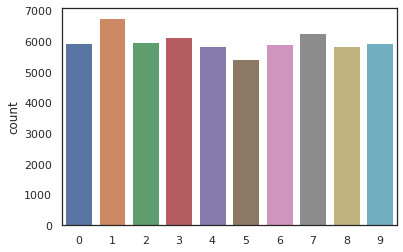

In [41]:

sns.set(style='white', context='notebook', palette='deep')
g = sns.countplot(y_train)


In [42]:
Y_train_values=pd.DataFrame(y_train,columns=['label'])
Y_train_values.value_counts()

label
1        6742
7        6265
3        6131
2        5958
9        5949
0        5923
6        5918
8        5851
4        5842
5        5421
dtype: int64

###Pre Processing the data

In [43]:

# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)



Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


###Implementing CNN 

In [44]:

# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3782 - accuracy: 0.8957 - val_loss: 0.2047 - val_accuracy: 0.9409
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1741 - accuracy: 0.9500 - val_loss: 0.1443 - val_accuracy: 0.9586
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1270 - accuracy: 0.9637 - val_loss: 0.1167 - val_accuracy: 0.9667
Epoch 4/10
469/469 [

In [45]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0832 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0085 - accuracy: 0.9982 - val_loss: 0.0883 - val_accuracy: 0.9763
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 0.0848 - val_accuracy: 0.9774
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.0844 - val_accuracy: 0.9780
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0917 - val_accuracy: 0.9776
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0046 - accuracy: 0.9994 - val_loss: 0.0891 - val_accuracy: 0.9773
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0034 - accuracy: 0.9997 - val_loss: 0.0888 - val_accuracy: 0.9777
Epoch 

In [46]:
predictions = model.predict(X_test)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 1s 2ms/step
7


### Testing the model

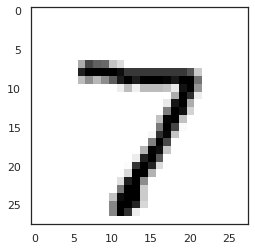

In [47]:

plt.imshow(X_test[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

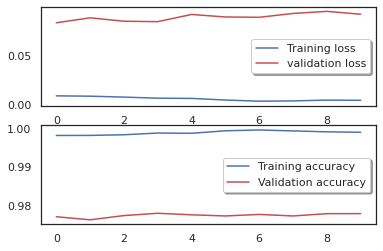

In [48]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)